In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from model_code import utils as mutils
from scripts import datasets
import torch

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
# get config
from configs.afhq.default_afhq_configs import get_config
config = get_config()

In [3]:
# Get the forward process definition
scales = config.model.blur_schedule
heat_forward_module = mutils.create_forward_process_from_sigmas(
    config, scales, config.device)

In [4]:
torch.set_default_dtype(torch.float64)

In [5]:
# load data
# Build data iterators
trainloader, testloader = datasets.get_dataset(
    config, uniform_dequantization=config.data.uniform_dequantization)
train_iter = iter(trainloader)
eval_iter = iter(testloader)

In [6]:
eval_batch = next(eval_iter)[0].to(config.device).float()

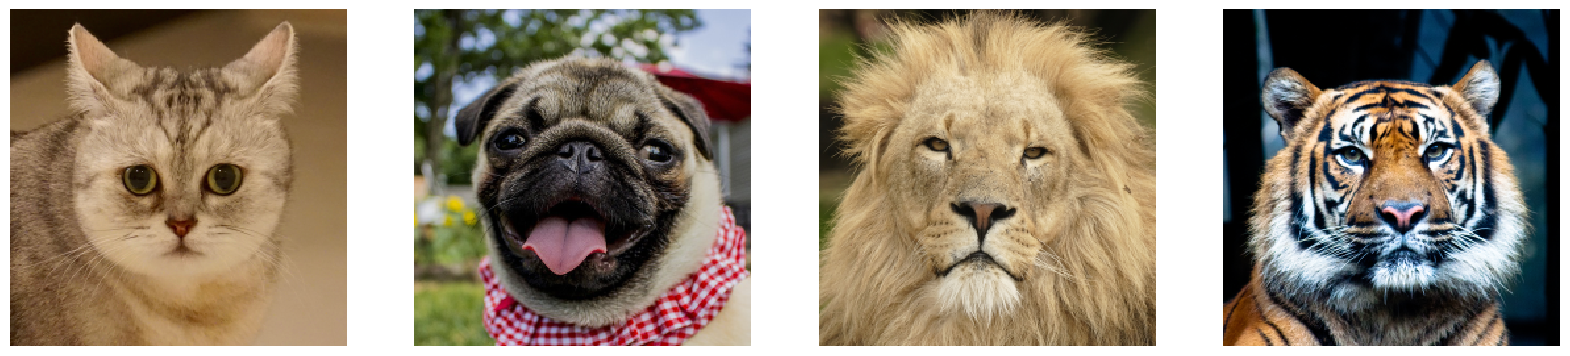

In [7]:
def plot_images(u):
    # Reshape the initial_sample tensor
    images = u.squeeze().cpu().numpy()

    # Display the images
    fig, axes = plt.subplots(1, len(images), figsize=(20, 20))
    for i, image in enumerate(images):
        # black and white images
        if len(images.shape) == 3:
            axes[i].imshow(image, cmap='gray', interpolation='none', vmin=0, vmax=1)
        # colored images
        else:
            # Transpose the image dimensions
            image = np.transpose(image, (1,2,0))
            axes[i].imshow(image, interpolation='none')
        axes[i].axis('off')

    plt.show()
plot_images(eval_batch)

In [8]:
def blur_tester(k):
    blurred = heat_forward_module(eval_batch, torch.tensor(np.array([k] * eval_batch.shape[0], dtype=np.float32), device=eval_batch.device))
    plot_images(blurred)
    for i in range(len(eval_batch)):
        print("Image", i)
        print(eval_batch[i].mean())
        print(blurred[i].mean())
        print(blurred[i].min(), blurred[i].max())

# control blur tester with interactive slider
slider = widgets.FloatSlider(min=0, max=1, step=0.0001)
widgets.interact(blur_tester, k=slider)

interactive(children=(FloatSlider(value=0.0, description='k', max=1.0, step=0.0001), Output()), _dom_classes=(…

<function __main__.blur_tester(k)>

/var/folders/5s/h912v31x5gj935j3y2b1s3040000gn/T/ipykernel_3795/3422107950.py:1: RuntimeWarning: divide by zero encountered in arctanh
  def f_1(t, max_blur=32): return np.arctanh(t) * max_blur * np.sin(t * torch.pi / 2)
/var/folders/5s/h912v31x5gj935j3y2b1s3040000gn/T/ipykernel_3795/3422107950.py:2: RuntimeWarning: divide by zero encountered in arctanh
  def f_2(t, max_blur=32): return np.arctanh(t) * max_blur * np.sin(t * torch.pi / 2) **3


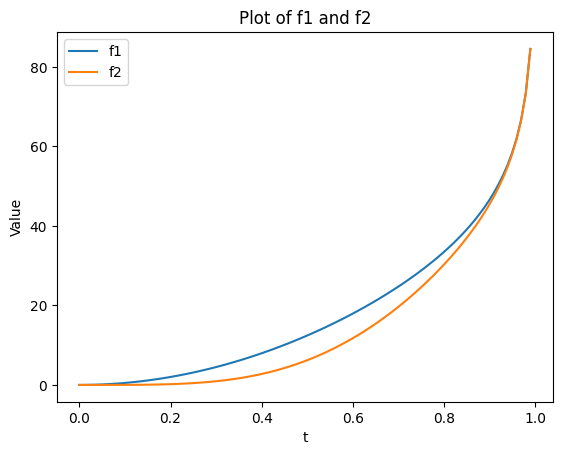

In [9]:
def f_1(t, max_blur=32): return np.arctanh(t) * max_blur * np.sin(t * torch.pi / 2)
def f_2(t, max_blur=32): return np.arctanh(t) * max_blur * np.sin(t * torch.pi / 2) **3

t = np.linspace(0, 1, 100)


plt.plot(t, f_1(t), label='f1')
plt.plot(t, f_2(t), label='f2')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Plot of f1 and f2')
plt.legend()
plt.show()


In [10]:
import numpy as np

import matplotlib.pyplot as plt

plt.plot(t, f(t))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Plot of f(t)')
plt.show()

NameError: name 'f' is not defined

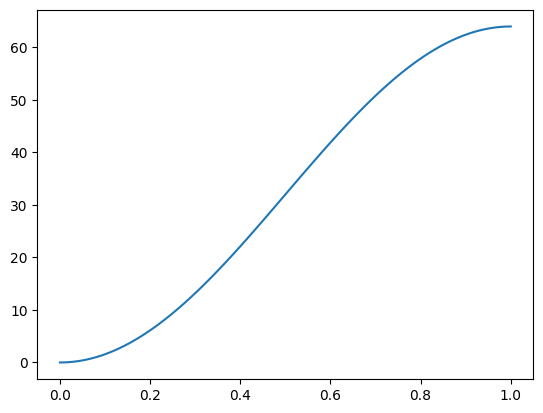

In [ ]:
# experiment with continuous timestep schedule
def blur(t):
    return 64 * np.sin(t * np.pi / 2)**2

t = np.linspace(0, 1, 100)
plt.plot(t, blur(t))

/var/folders/5s/h912v31x5gj935j3y2b1s3040000gn/T/ipykernel_2958/2232604193.py:2: RuntimeWarning: divide by zero encountered in divide
  return x / (1 - x)**4


(0.0, 64.0)

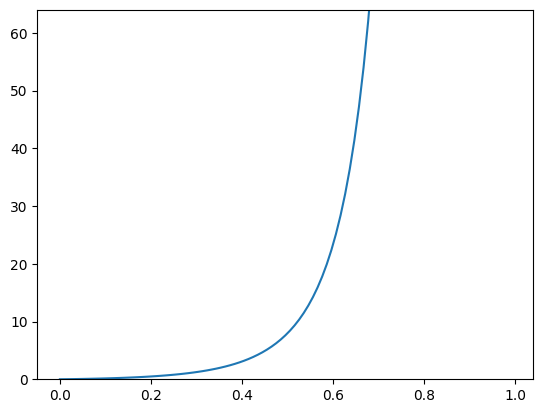

In [ ]:
def f(x):
        return x / (1 - x)**4
    
t = np.linspace(0, 1.0, 100)
plt.plot(t, f(t))
plt.ylim(0, 64)

(array([10.,  3.,  0.,  3.,  1.,  2.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
         1.,  0.,  1.,  3.,  3.,  0.,  1.,  1.,  3.,  0.,  0.,  1.,  0.,
         1.,  3.,  1.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.]),
 array([6.63442862e-05, 5.80481116e-01, 1.16089589e+00, 1.74131066e+00,
        2.32172543e+00, 2.90214020e+00, 3.48255497e+00, 4.06296974e+00,
        4.64338451e+00, 5.22379929e+00, 5.80421406e+00, 6.38462883e+00,
        6.96504360e+00, 7.54545837e+00, 8.12587314e+00, 8.70628791e+00,
        9.28670268e+00, 9.86711746e+00, 1.04475322e+01, 1.10279470e+01,
        1.16083618e+01, 1.21887765e+01, 1.27691913e+01, 1.33496061e+01,
  

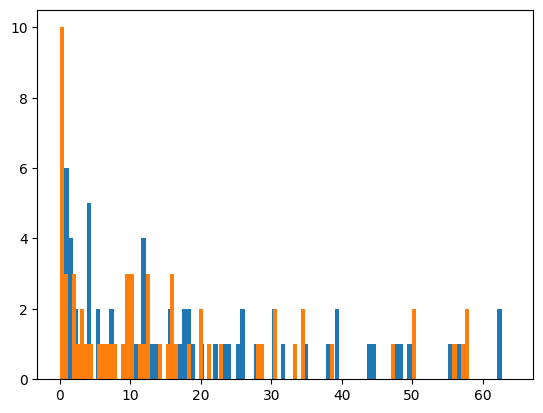

In [ ]:
# sample random distances in f
a = np.random.uniform(0.05, 1, 64)
# replace max a with 1
a[a.argmax()] = 1
b = np.random.uniform(0, a)
dist = blur(a) - blur(b)
plt.hist(dist, bins=100, range=(0, 64))
dist.min()
plt.hist(blur(b), bins=100)

/var/folders/5s/h912v31x5gj935j3y2b1s3040000gn/T/ipykernel_2958/2232604193.py:2: RuntimeWarning: divide by zero encountered in divide
  return x / (1 - x)**4


(array([24.,  7.,  3.,  3.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

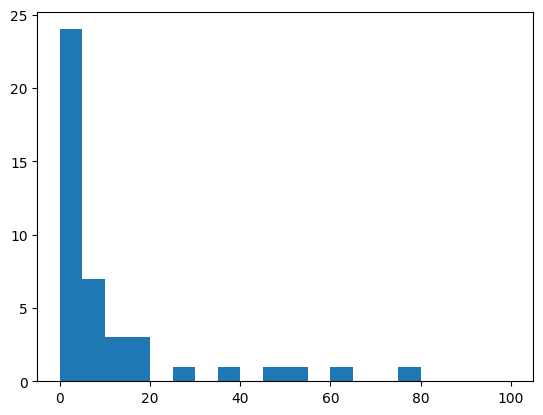

In [ ]:
# plot hist of f(a)
plt.hist(f(a), bins=20, range=(0, 100))

In [ ]:
a

array([0.93735802, 0.51781197, 0.36273919, 0.89264252, 0.84112146,
       0.13525849, 0.11994208, 0.46527233, 0.8864391 , 0.29961069,
       0.82707891, 0.71341312, 0.79760229, 0.05376619, 0.09835341,
       0.09500559, 0.09731577, 0.8308898 , 0.53759761, 0.5181116 ,
       0.81978415, 0.45440082, 0.58150491, 0.57851369, 0.83647726,
       0.57807969, 0.52278105, 0.52954294, 0.29901911, 0.92490047,
       0.67798905, 0.8190703 , 0.38395995, 0.3115193 , 0.65951346,
       0.09962704, 0.91966592, 0.46207253, 0.85073272, 0.61198729,
       0.83877229, 0.69433661, 0.47876185, 0.32144672, 0.64011877,
       0.26239542, 1.        , 0.5070804 , 0.91263662, 0.89249253,
       0.38034301, 0.21203037, 0.3961158 , 0.44954127, 0.1723529 ,
       0.76868149, 0.82987047, 0.18464637, 0.66683003, 0.8547142 ,
       0.24867999, 0.37523802, 0.27784773, 0.241405  ])

In [ ]:
a = np.random.rand(100)
(1 - a.max())**100 * 0.8

0.0